In [100]:
import pandas as pd
import numpy as np
import seaborn as sns

In [55]:
def add_data_info():
    df1 = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-m-points-from-2017.csv', encoding= 'unicode_escape', low_memory=False)
    df2 = pd.read_csv('raw_data/charting-m-matches.csv', encoding= 'unicode_escape', low_memory=False)
    
    #get separated values from m-matches list of games - based on matchid
    df = pd.merge(df1,df2[['match_id','Date','Tournament','Round','Surface','Player 1','Player 2']], on=['match_id'], how='left')
    
    #add the condition of "Grand Slam" - 5 or 3 sets
    conditions = df['Tournament'].isin(["Wimbledon", "Australian Open", "US Open", "Roland Garros"])
    values = [1,0]

    # Create a new column  based on the conditions and values
    df['Grand Slam'] = pd.Series(pd.NA)
    df.loc[conditions, 'Grand Slam'] = values[0]
    df.loc[~conditions, 'Grand Slam'] = values[1]
    
    # save the original dataset with enriched data for future features
    df.to_csv('raw_data/charting-m-points-from-2017-enriched.csv', index=False)

In [109]:
def filter_player(df,opponent):
    
    # Read the dataset into a pandas DataFrame - from enriched file
    df = pd.read_csv(df, encoding= 'unicode_escape', low_memory=False)
    
    ## filtra pelo  oponente
    df = df[(df["Player 1"].str.contains(opponent)) | (df["Player 2"].str.contains(opponent))].copy()
    
    ##define se está sacando e se ganhou o ponto
    df['i_serve'] = np.where(((df['Svr'] == 1) & (df['Player 1'] == opponent )) | ((df['Svr'] == 2) & (df['Player 2'] == opponent)), 0, 1)
    df['i_win'] = np.where(((df['isSvrWinner'] == df['i_serve'])), 1, 0)
    df['is_second_service'] = np.where(((df['2nd'].isnull())), 0, 1)
    
    ## direção do saque
    # primeiro caractere do segundo saque
    df['dir_srv'] = df.loc[:, '2nd'].str[0]
    ## completa com o primeiro caractere do primeiro saque quando ele entrou
    df['dir_srv'].fillna(df.loc[:, '1st'].str[0], inplace=True)
    
    ##
    df['rallyCount']=pd.to_numeric(df['rallyCount'])
    
    ##reseta o indice
    df.reset_index(inplace=True)
    
    ## salva arquivo e retorna dataset da funcao
    csv_file = "raw_data/" + opponent + "_points.csv"
    df.to_csv(csv_file, index=False)
    return df

In [104]:
add_data_info()

In [110]:
df = filter_player('raw_data/charting-m-points-from-2017-enriched.csv','Novak Djokovic')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19324 entries, 0 to 19323
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              19324 non-null  int64  
 1   match_id           19324 non-null  object 
 2   Pt                 19324 non-null  int64  
 3   Set1               19324 non-null  int64  
 4   Set2               19324 non-null  int64  
 5   Gm1                19324 non-null  int64  
 6   Gm2                19324 non-null  int64  
 7   Pts                19324 non-null  object 
 8   Gm#                19324 non-null  object 
 9   TbSet              19324 non-null  object 
 10  TB?                19324 non-null  object 
 11  TBpt               682 non-null    float64
 12  Svr                19324 non-null  int64  
 13  Ret                19324 non-null  int64  
 14  Serving            19324 non-null  object 
 15  1st                19324 non-null  object 
 16  2nd                672

In [108]:
df.head(20)

,index,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,Gm#,TbSet,...,Tournament,Round,Surface,Player 1,Player 2,Grand Slam,i_serve,i_win,is_second_service,dir_srv
0,637,20221120-M-Tour_Finals-F-Novak_Djokovic-Casper...,1,0,0,0,0,0-0,1 (1),1,...,Tour Finals,F,Hard,Novak Djokovic,Casper Ruud,0,0,1,1,4
1,638,20221120-M-Tour_Finals-F-Novak_Djokovic-Casper...,2,0,0,0,0,0-15,1 (2),1,...,Tour Finals,F,Hard,Novak Djokovic,Casper Ruud,0,0,0,1,6
2,639,20221120-M-Tour_Finals-F-Novak_Djokovic-Casper...,3,0,0,0,0,15-15,1 (3),1,...,Tour Finals,F,Hard,Novak Djokovic,Casper Ruud,0,0,0,0,4
3,640,20221120-M-Tour_Finals-F-Novak_Djokovic-Casper...,4,0,0,0,0,30-15,1 (4),1,...,Tour Finals,F,Hard,Novak Djokovic,Casper Ruud,0,0,0,1,5
4,641,20221120-M-Tour_Finals-F-Novak_Djokovic-Casper...,5,0,0,0,0,40-15,1 (5),1,...,Tour Finals,F,Hard,Novak Djokovic,Casper Ruud,0,0,0,0,4
5,642,20221120-M-Tour_Finals-F-Novak_Djokovic-Casper...,6,0,0,1,0,0-0,2 (1),1,...,Tour Finals,F,Hard,Novak Djokovic,Casper Ruud,0,1,1,1,6
6,643,20221120-M-Tour_Finals-F-Novak_Djokovic-Casper...,7,0,0,1,0,15-0,2 (2),1,...,Tour Finals,F,Hard,Novak Djokovic,Casper Ruud,0,1,0,1,5
7,644,20221120-M-Tour_Finals-F-Novak_Djokovic-Casper...,8,0,0,1,0,15-15,2 (3),1,...,Tour Finals,F,Hard,Novak Djokovic,Casper Ruud,0,1,0,1,5
8,645,20221120-M-Tour_Finals-F-Novak_Djokovic-Casper...,9,0,0,1,0,15-30,2 (4),1,...,Tour Finals,F,Hard,Novak Djokovic,Casper Ruud,0,1,0,1,6
9,646,20221120-M-Tour_Finals-F-Novak_Djokovic-Casper...,10,0,0,1,0,15-40,2 (5),1,...,Tour Finals,F,Hard,Novak Djokovic,Casper Ruud,0,1,1,1,5


In [88]:
df['rallyCount']=pd.to_numeric(df['rallyCount'])

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19324 entries, 0 to 19323
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              19324 non-null  int64  
 1   match_id           19324 non-null  object 
 2   Pt                 19324 non-null  int64  
 3   Set1               19324 non-null  int64  
 4   Set2               19324 non-null  int64  
 5   Gm1                19324 non-null  int64  
 6   Gm2                19324 non-null  int64  
 7   Pts                19324 non-null  object 
 8   Gm#                19324 non-null  object 
 9   TbSet              19324 non-null  object 
 10  TB?                19324 non-null  object 
 11  TBpt               682 non-null    float64
 12  Svr                19324 non-null  int64  
 13  Ret                19324 non-null  int64  
 14  Serving            19324 non-null  object 
 15  1st                19324 non-null  object 
 16  2nd                672

In [101]:
X = df[['Grand Slam','i_serve','i_win','is_second_service']]
X

,Grand Slam,i_serve,i_win,is_second_service
0,0,0,1,1
1,0,0,0,1
2,0,0,0,0
3,0,0,0,1
4,0,0,0,0
...,...,...,...,...
19319,0,0,1,0
19320,0,0,0,1
19321,0,0,0,0
19322,0,0,0,1


<Axes: >

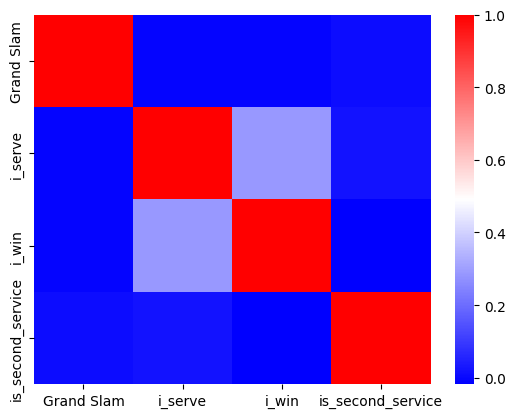

In [102]:
corr = X.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= 'bwr')

In [ ]:
def data_clean(df):
    ## rallycount to int
    df['rallyCount']= pd.to_numeric(df['rallyCount')])
    df = df[['Surface','Round','Grand Slam','i_serve','i_win','is_second_service']]
    